# <center style="color:green;font-weight:bold">Gyalpozhing College of Information Technology</center>

# <center style="color:red;font-weight:bold">Currency Exchange Rate Prediction</center>

<center><img src="currency_rates.jpg"></center>

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data loading

In [2]:
time = pd.read_csv("time.csv", parse_dates=True)
time.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [3]:
time.tail(10)

,date,rate
12639,2021-06-14,73.16
12640,2021-06-15,73.35
12641,2021-06-16,73.31
12642,2021-06-17,74.16
12643,2021-06-18,74.14
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14
12648,2021-06-25,74.14


In [4]:
time.shape

(12649, 2)

In [5]:
xdf = time[["date","rate"]]
xdf.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


### Extracting Date, Month, Year

In [6]:
df = pd.read_csv("time.csv")
df.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df.drop(columns=["date"], inplace=True)

df.head()

,rate,day,month,year
0,8.02,2.0,1.0,1973.0
1,8.02,3.0,1.0,1973.0
2,8.00,4.0,1.0,1973.0
3,8.01,5.0,1.0,1973.0
4,8.00,8.0,1.0,1973.0


In [9]:
df.isna().sum()

rate     0
day      7
month    7
year     7
dtype: int64

### Missing values in each columns

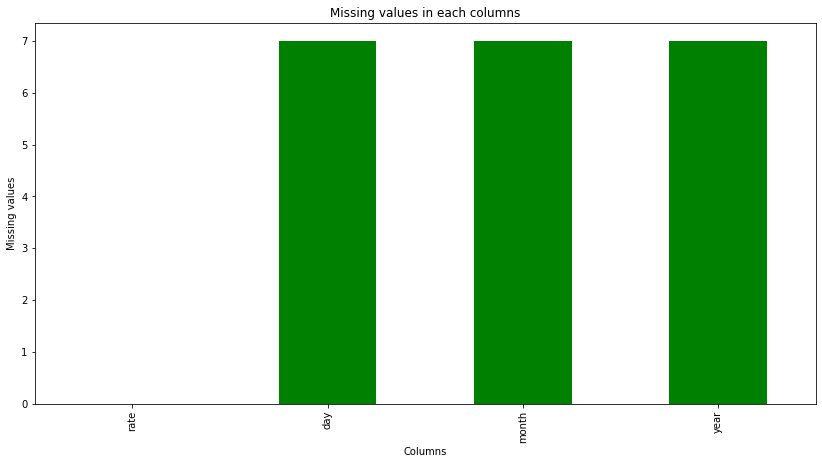

In [10]:
missing = pd.DataFrame(df.isnull().sum(), columns=["count"])
missing.plot(kind="bar",
            title="Missing values in each columns",
            color="green",
            xlabel="Columns",
            ylabel="Missing values",
            legend=False,
            figsize=(14, 7));

### Statistical Summary of the dataframe

In [11]:
df.describe()

,rate,day,month,year
count,12649.000000,12642.000000,12642.000000,12642.000000
mean,34.207112,15.730660,6.491299,1996.749802
std,21.113315,8.797423,3.449473,13.995382
min,7.190000,1.000000,1.000000,1973.000000
25%,12.070000,8.000000,4.000000,1985.000000
50%,35.890000,16.000000,6.000000,1997.000000
75%,47.660000,23.000000,9.000000,2009.000000
max,76.950000,31.000000,12.000000,2021.000000


### Summary of the dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rate    12649 non-null  float64
 1   day     12642 non-null  float64
 2   month   12642 non-null  float64
 3   year    12642 non-null  float64
dtypes: float64(4)
memory usage: 395.4 KB


### Datatypes of each columns

In [13]:
df.dtypes

rate     float64
day      float64
month    float64
year     float64
dtype: object

### Select Features and Target variables

In [14]:
features = df.drop(columns=["rate"])
target = df[["rate"]]

### Handling missing values

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

data = imputer.fit_transform(features)
X = pd.DataFrame(data, columns=features.columns)
X[["day","month","year"]] = X[["day","month","year"]].astype("int64")

X.head()

,day,month,year
0,2,1,1973
1,3,1,1973
2,4,1,1973
3,5,1,1973
4,8,1,1973


In [16]:
impute_y = SimpleImputer(strategy="mean")

data = impute_y.fit_transform(target)
y = pd.DataFrame(data, columns=target.columns)

y.head()

,rate
0,8.02
1,8.02
2,8.00
3,8.01
4,8.00


In [17]:
df.head()

,rate,day,month,year
0,8.02,2.0,1.0,1973.0
1,8.02,3.0,1.0,1973.0
2,8.00,4.0,1.0,1973.0
3,8.01,5.0,1.0,1973.0
4,8.00,8.0,1.0,1973.0


### Visualisation

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
xdf.date = pd.to_datetime(xdf.date)

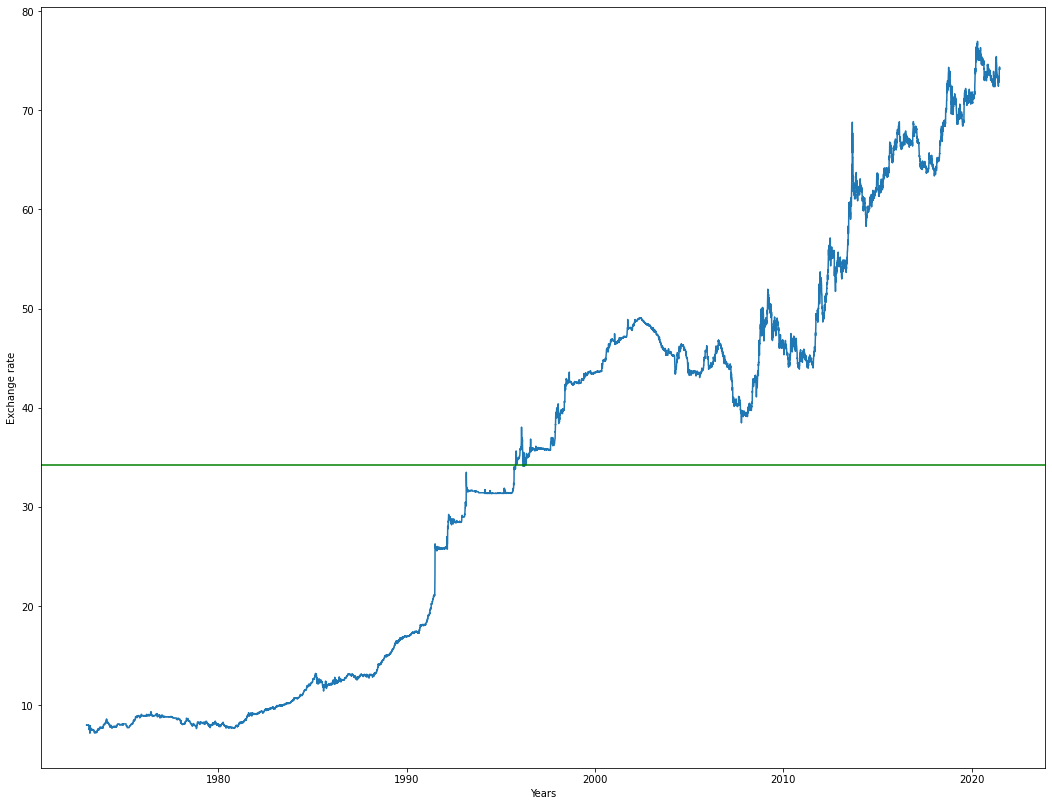

In [20]:
plt.figure(figsize=(18, 14))
plt.plot(xdf.date, xdf.rate)
plt.axhline(y=xdf.rate.mean(), color="green", label="Average Exchange rate")
plt.xlabel("Years")
plt.ylabel("Exchange rate")
plt.show()

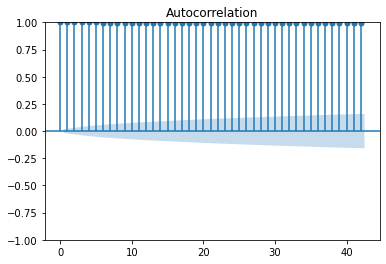

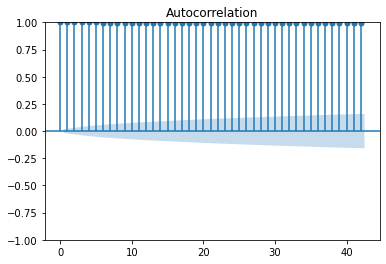

In [21]:
# By using the autocorrelation:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(xdf.rate)

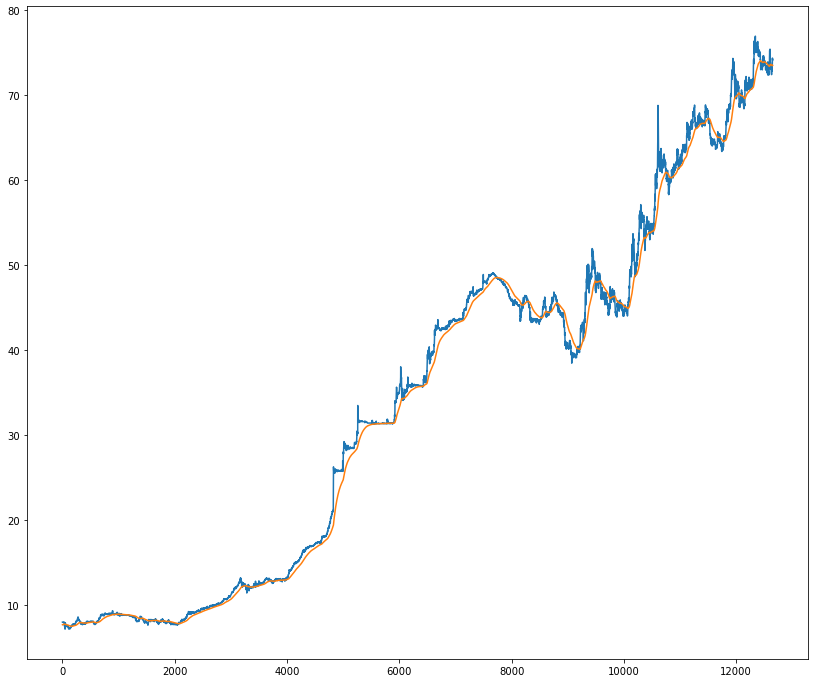

In [22]:
#Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing
es = SimpleExpSmoothing(xdf.rate.values)
plt.figure(figsize=(14, 12))
es.fit(smoothing_level=0.01)
plt.plot(xdf.rate.values)
plt.plot(es.predict(es.params, start=0, end=None))
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rate    12649 non-null  float64
 1   day     12642 non-null  float64
 2   month   12642 non-null  float64
 3   year    12642 non-null  float64
dtypes: float64(4)
memory usage: 395.4 KB


In [24]:
df.head()

,rate,day,month,year
0,8.02,2.0,1.0,1973.0
1,8.02,3.0,1.0,1973.0
2,8.00,4.0,1.0,1973.0
3,8.01,5.0,1.0,1973.0
4,8.00,8.0,1.0,1973.0


### Splitting dataset into train and test sets

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print()
print("x_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (10119, 3)
y_train size: (10119, 1)

x_test size: (2530, 3)
y_test size: (2530, 1)


## Model Training

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

# fit the model
forest.fit(x_train, y_train)

<ipython-input-27-697f3b2d3224>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


RandomForestRegressor()

### Model Evaluation

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [29]:
print(f"MSE:", mean_absolute_error(y_test, forest.predict(x_test)))
print("r2_score:", r2_score(y_test, forest.predict(x_test)))
print("MAE:", mean_absolute_error(y_test, forest.predict(x_test)))

MSE: 0.10589731385160743
r2_score: 0.9991196303323473
MAE: 0.10589731385160743


### Make a prediction

In [30]:
sample = x_test.iloc[0:1, :]
sample

,day,month,year
5013,20,3,1992


In [31]:
y_pred = forest.predict(sample)
y_pred[0]

28.608299999999957

## Machine Pipeline Model

### Features and Target variables

In [32]:
X.head()

,day,month,year
0,2,1,1973
1,3,1,1973
2,4,1,1973
3,5,1,1973
4,8,1,1973


In [33]:
y.head()

,rate
0,8.02
1,8.02
2,8.00
3,8.01
4,8.00


* Create pre-processing pipeline

In [34]:
from sklearn.pipeline import Pipeline

# Pre-Processing pipeline for Numeric Feautures
transformer = Pipeline(steps=
    [
        ("imputeN", SimpleImputer(strategy="mean"))
    ]
)

transformer

Pipeline(steps=[('imputeN', SimpleImputer())])

* Apply transformer

In [35]:
from sklearn.compose import ColumnTransformer

pre = ColumnTransformer(transformers=
                        [
                            ("numeric", transformer, features.columns)
                        ]
)

pre

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputeN', SimpleImputer())]),
                                 Index(['day', 'month', 'year'], dtype='object'))])

* Estimator to the Pipeline

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [37]:
rf_model = Pipeline(steps=
                   [
                       ("preprocessing", pre),
                       ("est", rf)
                   ]
)

rf_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer())]),
                                                  Index(['day', 'month', 'year'], dtype='object'))])),
                ('est', RandomForestRegressor())])

* Train a Pipeline model

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)

In [39]:
from sklearn import set_config

# train pipeline model
set_config(display="diagram")
rf_model.fit(X_train, Y_train)

C:\Users\aitab\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer())]),
                                                  Index(['day', 'month', 'year'], dtype='object'))])),
                ('est', RandomForestRegressor())])

### Actual and Predicted Rates

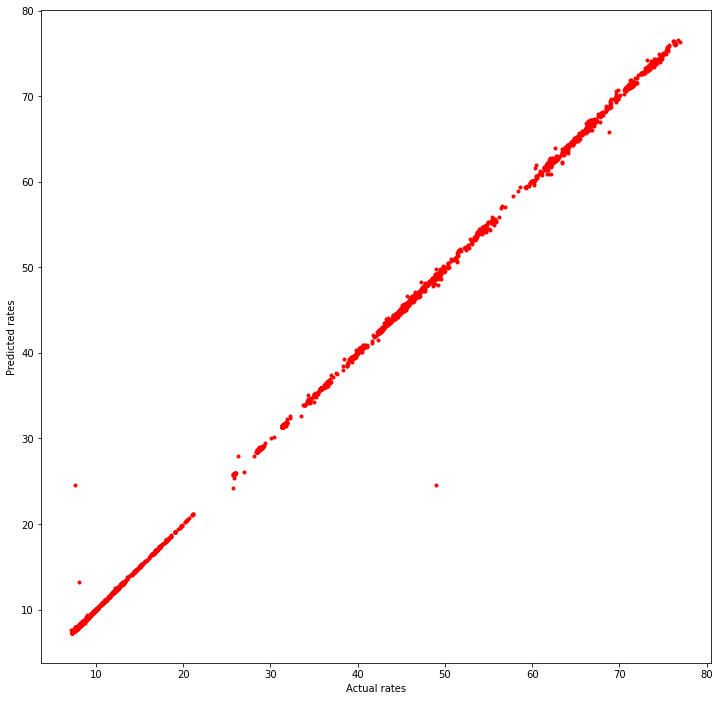

In [40]:
plt.figure(figsize=(12, 12))
plt.scatter(Y_test, rf_model.predict(X_test), color="r", marker='.')
plt.xlabel("Actual rates")
plt.ylabel("Predicted rates")

plt.show()

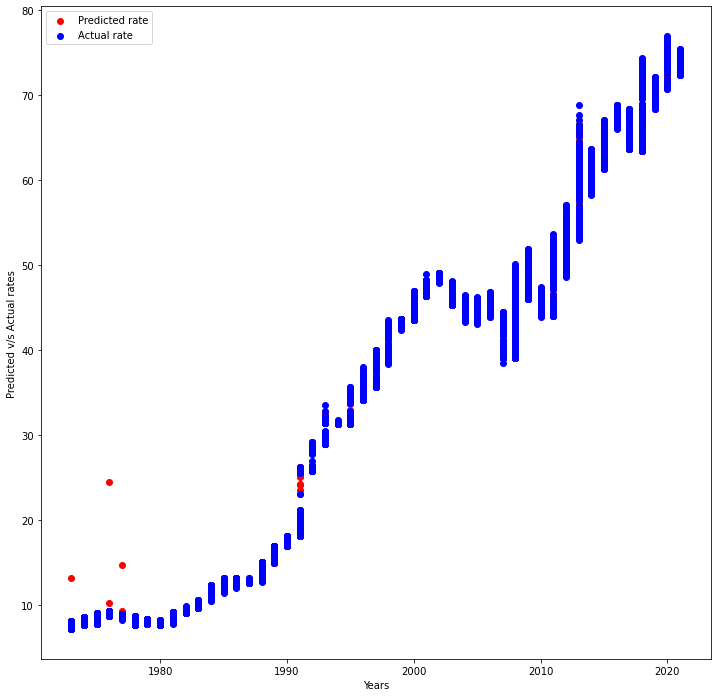

In [41]:
plt.figure(figsize=(12, 12))
plt.scatter(df.year, rf_model.predict(df[["day", "month", "year"]]), color="red", label="Predicted rate")
plt.scatter(df.year, df.rate, color="blue", label="Actual rate")
plt.xlabel("Years")
plt.ylabel("Predicted v/s Actual rates")
plt.legend()

plt.show()

### Save the model

In [42]:
# import library to save the trained ML model
# import pickle

# save the model
# rf_pickle = open("rates_predictor.pickle", "wb")
# pickle.dump(rf_model, rf_pickle)
# rf_pickle.close()

### Load the saved model

In [43]:
# model = pickle.load(open("rates_predictor.pickle", "rb"))
# model

In [44]:
from joblib import dump
dump(rf_model,"./../savedModel/model.joblib")

['./../savedModel/model.joblib']

### Model Evaluation

In [45]:
print(f"MSE: {np.round(mean_squared_error(Y_test, rf_model.predict(X_test)), 4)}")
print(f"r2_score: {np.round(r2_score(Y_test, rf_model.predict(X_test)), 4)}")
print(f"MAE: {np.round(mean_absolute_error(Y_test, rf_model.predict(X_test)), 4)}")

MSE: 0.3205
r2_score: 0.9993
MAE: 0.1064


### Make a Prediction

In [46]:
y_pred = rf_model.predict(X_test)

In [47]:
outputs = pd.DataFrame({"Predicted rate":y_pred, "Actual rate":Y_test.rate})
outputs.head(10)

,Predicted rate,Actual rate
5013,28.6064,28.75
6224,35.8558,36.12
7834,47.9624,47.96
1701,7.9608,7.96
5477,31.4400,31.44
9140,39.1872,39.26
9599,46.4037,46.02
2303,9.1363,9.13
5090,28.6126,28.60
7975,46.1542,46.13


### Prediction of USD rate after One week

In [48]:
real_data = pd.DataFrame({"day":[17], "month":[11], "year":[2022]})
real_data

,day,month,year
0,17,11,2022


In [49]:

print(f"USD Rate: {np.round(rf_model.predict(real_data)[0], 3)}")

USD Rate: 73.875


# <center style="color:red;font-weight:bold;"> ~ ~ The End! ~ ~ </center>